# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_left = pd.merge(left=mouse_metadata, right=study_results, how='left')
# Display the data table for preview
merged_left

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [90]:
# Checking the number of mice.
mice_count = merged_left.value_counts('Mouse ID')
mice_count

Mouse ID
g989    13
a203    10
n364    10
m546    10
m550    10
        ..
x226     1
b447     1
f932     1
l872     1
n482     1
Length: 249, dtype: int64

In [91]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_left.loc[merged_left.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [92]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = merged_left.loc[merged_left['Mouse ID'] == "g989", :]
duplicate_mouse_ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [93]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_drop = merged_left[merged_left['Mouse ID'].isin(duplicate_mice) == False]
clean_mouse_drop

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [94]:
# Checking the number of mice in the clean DataFrame.
count_mouse_drop = clean_mouse_drop['Mouse ID'].nunique()
count_mouse_drop

248

## Summary Statistics

In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumors_mean = clean_mouse_drop.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumors_median = clean_mouse_drop.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumors_var =  clean_mouse_drop.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumors_sd = clean_mouse_drop.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumors_sem = clean_mouse_drop.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Summary_statistics = pd.DataFrame({"Tumor Mean" : tumors_mean, "Tumors Median" : tumors_median, "Tumors Variance" : tumors_var, "Tumors Standard Dev" : tumors_sd, "Tumors SEM" : tumors_sem})
Summary_statistics


,Tumor Mean,Tumors Median,Tumors Variance,Tumors Standard Dev,Tumors SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
tumors_mean = clean_mouse_drop.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumors_median = clean_mouse_drop.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumors_var =  clean_mouse_drop.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumors_sd = clean_mouse_drop.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumors_sem = clean_mouse_drop.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# Using the aggregation method, produce the same summary statistics in a single line.
summary_ag = clean_mouse_drop.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_ag

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [97]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = clean_mouse_drop["Drug Regimen"].value_counts()
mice_count


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'number of mice tested')

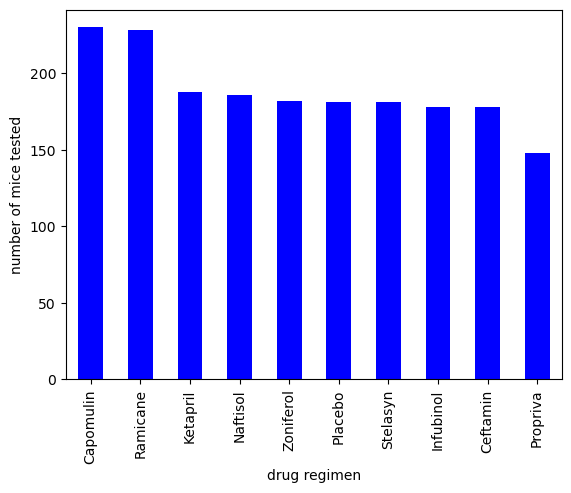

In [98]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plot_pandas = mice_count.plot.bar(color="b")
plt.xlabel("drug regimen")
plt.ylabel("number of mice tested")



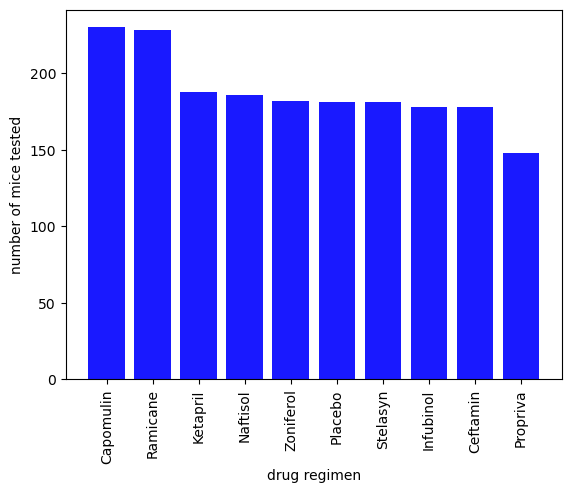

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color="b", alpha=.9 , align= "center")
plt.xlabel("drug regimen")
plt.ylabel("number of mice tested")
plt.xticks(rotation="vertical")

plt.show()

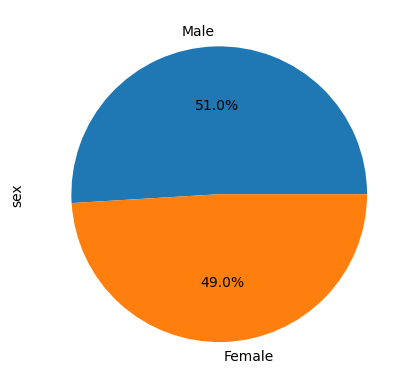

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pie = clean_mouse_drop["Sex"].value_counts()
labels = ["Female", "Male"]
sizes = [49.0, 51.0]
plot = gender_pie.plot.pie(y="Total Count", autopct= "%1.1f%%")
plt.ylabel("sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [101]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
Capomulin_df = clean_mouse_drop.loc[clean_mouse_drop["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_mouse_drop.loc[clean_mouse_drop["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_mouse_drop.loc[clean_mouse_drop["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_mouse_drop.loc[clean_mouse_drop["Drug Regimen"] == "Ceftamin", :]

# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drug_list = [ "Capomulin", "Ramicane", "Infubinol","Ceftamin"]
drugs = merged_left[merged_left["Drug Regimen"].isin(drug_list)]
drugs.head()
# Start by getting the last (greatest) timepoint for each mouse
last_tmpt = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size= ("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_tmpt = last_tmpt.stack(level = 0).unstack(level=0)
for drug in drug_list:
    print(drug)



Capomulin
Ramicane
Infubinol
Ceftamin


In [102]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
treatment = 0 
for drug in drug_list:
    quartiles = last_tmpt[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq - lowerq, 2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq - (1.5*iqr),2)

    if treatment == 0:
        print(f"-----------")
    print(f"the lower quartile of {drug} treatment is: {lowerq}")
    print(f"the upper quartile of {drug} treatment is: {upperq}")
    print(f"the interquartile  rangevof {drug} treatment is: {iqr}")
    print(f"values below {lower_bound} could be {drug} outliers")
    print(f"values below {upper_bound} could be {drug} outliers")
    print(f"----------")
    treatment+=1
    

-----------
the lower quartile of Capomulin treatment is: 32.38
the upper quartile of Capomulin treatment is: 40.16
the interquartile  rangevof Capomulin treatment is: 7.78
values below 20.71 could be Capomulin outliers
values below 28.49 could be Capomulin outliers
----------
the lower quartile of Ramicane treatment is: 31.56
the upper quartile of Ramicane treatment is: 40.66
the interquartile  rangevof Ramicane treatment is: 9.1
values below 17.91 could be Ramicane outliers
values below 27.01 could be Ramicane outliers
----------
the lower quartile of Infubinol treatment is: 54.05
the upper quartile of Infubinol treatment is: 65.53
the interquartile  rangevof Infubinol treatment is: 11.48
values below 36.83 could be Infubinol outliers
values below 48.31 could be Infubinol outliers
----------
the lower quartile of Ceftamin treatment is: 48.72
the upper quartile of Ceftamin treatment is: 64.3
the interquartile  rangevof Ceftamin treatment is: 15.58
values below 25.35 could be Ceftamin 

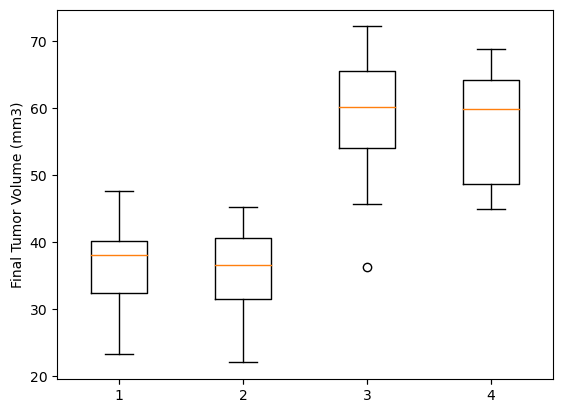

In [103]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_tmpt[drug].dropna()))

fig = plt.figure()
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4])
plt.boxplot(boxplot_list)
plt.show()



## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

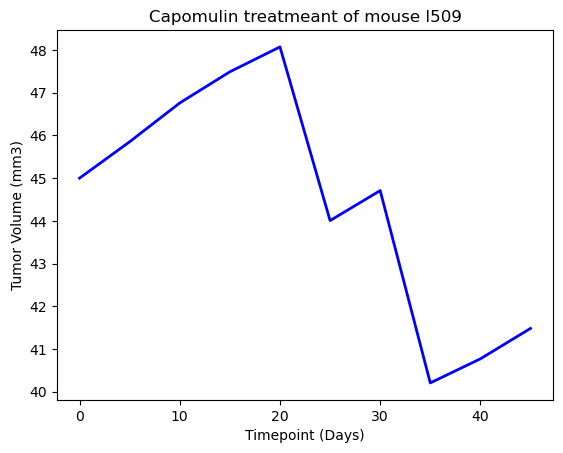

In [104]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')




Text(0, 0.5, 'Avg Tumor Volume (mm3)')

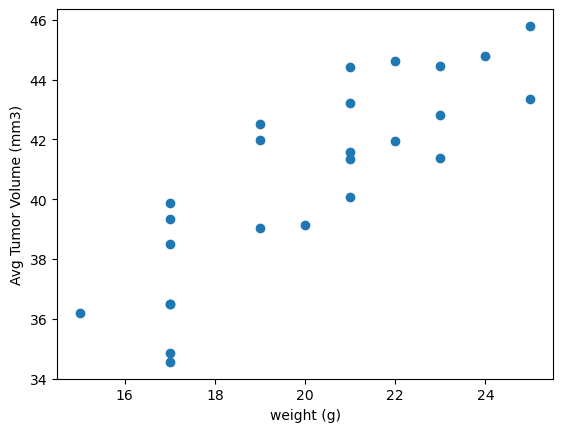

In [105]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, axl = plt.subplots()
avg_cap = Capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(avg_cap["Weight (g)"],avg_cap["Tumor Volume (mm3)"])
plt.xlabel("weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and avg tumor volume is 0.84


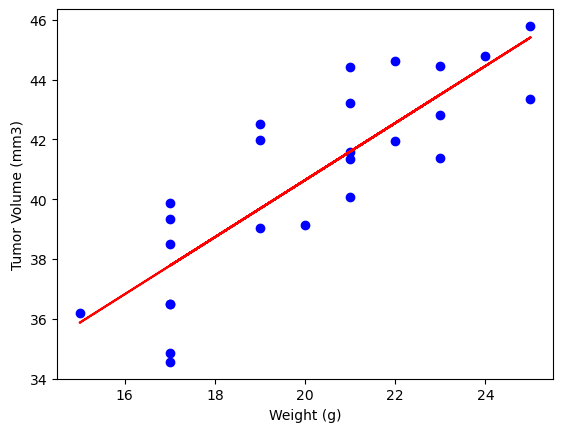

In [106]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_cap["Weight (g)"],avg_cap["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and avg tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_cap["Weight (g)"],avg_cap["Tumor Volume (mm3)"])
regress_values=avg_cap["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"


plt.scatter(avg_cap["Weight (g)"],avg_cap["Tumor Volume (mm3)"],color="b")
plt.plot(avg_cap["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

